# Diabetes Dataset Analysis (EDA)

**Author:** Arunkumar  
**Date:** 29/06/2025

---

## Introduction

This notebook presents a professional exploratory data analysis (EDA) of the diabetes dataset. The goal is to understand the patterns and features associated with diabetes, preparing the way for later machine learning modeling. Clear commentary and insights are provided throughout.

---


## 1. Data Loading & Initial Overview

Let's load the dataset and review its structure, sample records, and basic statistics.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("health care diabetes.csv")

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Data Cleaning

Check for missing values, zeros (potentially representing missing data), and prepare the dataset for analysis.


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#df.describe()

## 1. Exploratory Data Analysis (EDA)

Visualize distributions, feature relationships, and compare subgroups (diabetes vs. no diabetes).


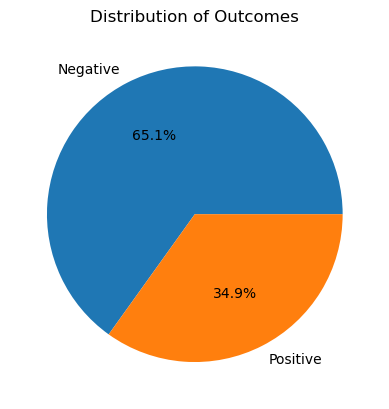

In [12]:
import matplotlib.pyplot as plt

# Get counts for each outcome
counts = df["Outcome"].value_counts()  

labels = ["Negative", "Positive"]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct="%1.1f%%")
ax.set_title("Distribution of Outcomes")
plt.show()


Understanding the class balance is crucial before any modeling. In this dataset, around 65% of cases are “Negative” (no diabetes), while about 35% are “Positive” (diabetes present).

This moderate class imbalance is important to keep in mind for machine learning, as some models might bias toward the majority class. The relatively high prevalence of diabetes in this population highlights the significance of identifying key predictors and possible intervention points.

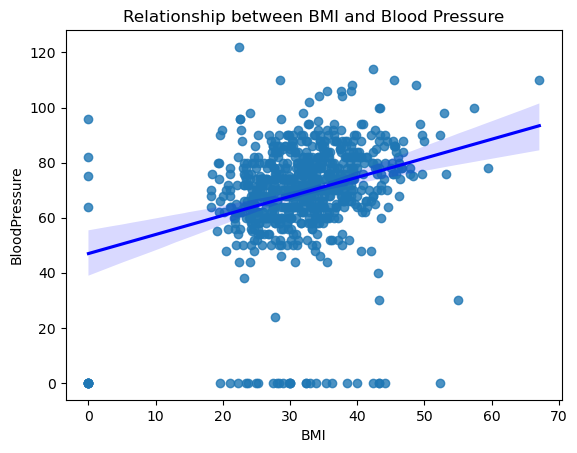

In [14]:
import seaborn as sns

sns.regplot(x="BMI", y="BloodPressure", data=df  , line_kws={'color':'b'})
plt.title('Relationship between BMI and Blood Pressure')
plt.show()


## Analysis: Relationship between BMI and Blood Pressure
This scatterplot, with a regression line, explores the relationship between Body Mass Index (BMI) and Blood Pressure in the diabetes dataset
- While the overall trend is upward, the scatter of points indicates the relationship is not very strong. Other factors likely play a major role in determining blood pressure.
- There is considerable spread of blood pressure values for each BMI value, suggesting variability in blood pressure even among individuals with similar BMI.
- Most data points cluster between BMI values of 20 to 40 and blood pressure values of 60 to 90.

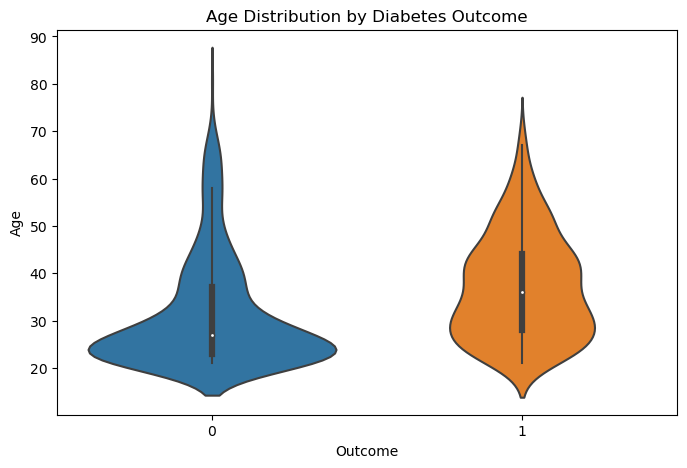

In [20]:

plt.figure(figsize=(8,5))
sns.violinplot(x="Outcome", y="Age", data=df)
plt.title("Age Distribution by Diabetes Outcome")
plt.show()


## Insight
This violin plot reveals the age distributions for diabetic and non-diabetic groups.
Interestingly, while the median age is similar in both groups, the distribution for non-diabetic patients is broader, with more older individuals who do not have diabetes. 

The diabetic group is more concentrated in the mid-age range, suggesting that age alone does not strongly separate the two outcomes in this dataset.
This reinforces the importance of considering multiple risk factors together, as diabetes can occur across a wide age range, not just among the elderly.

C:\Users\arunk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arunk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arunk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arunk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

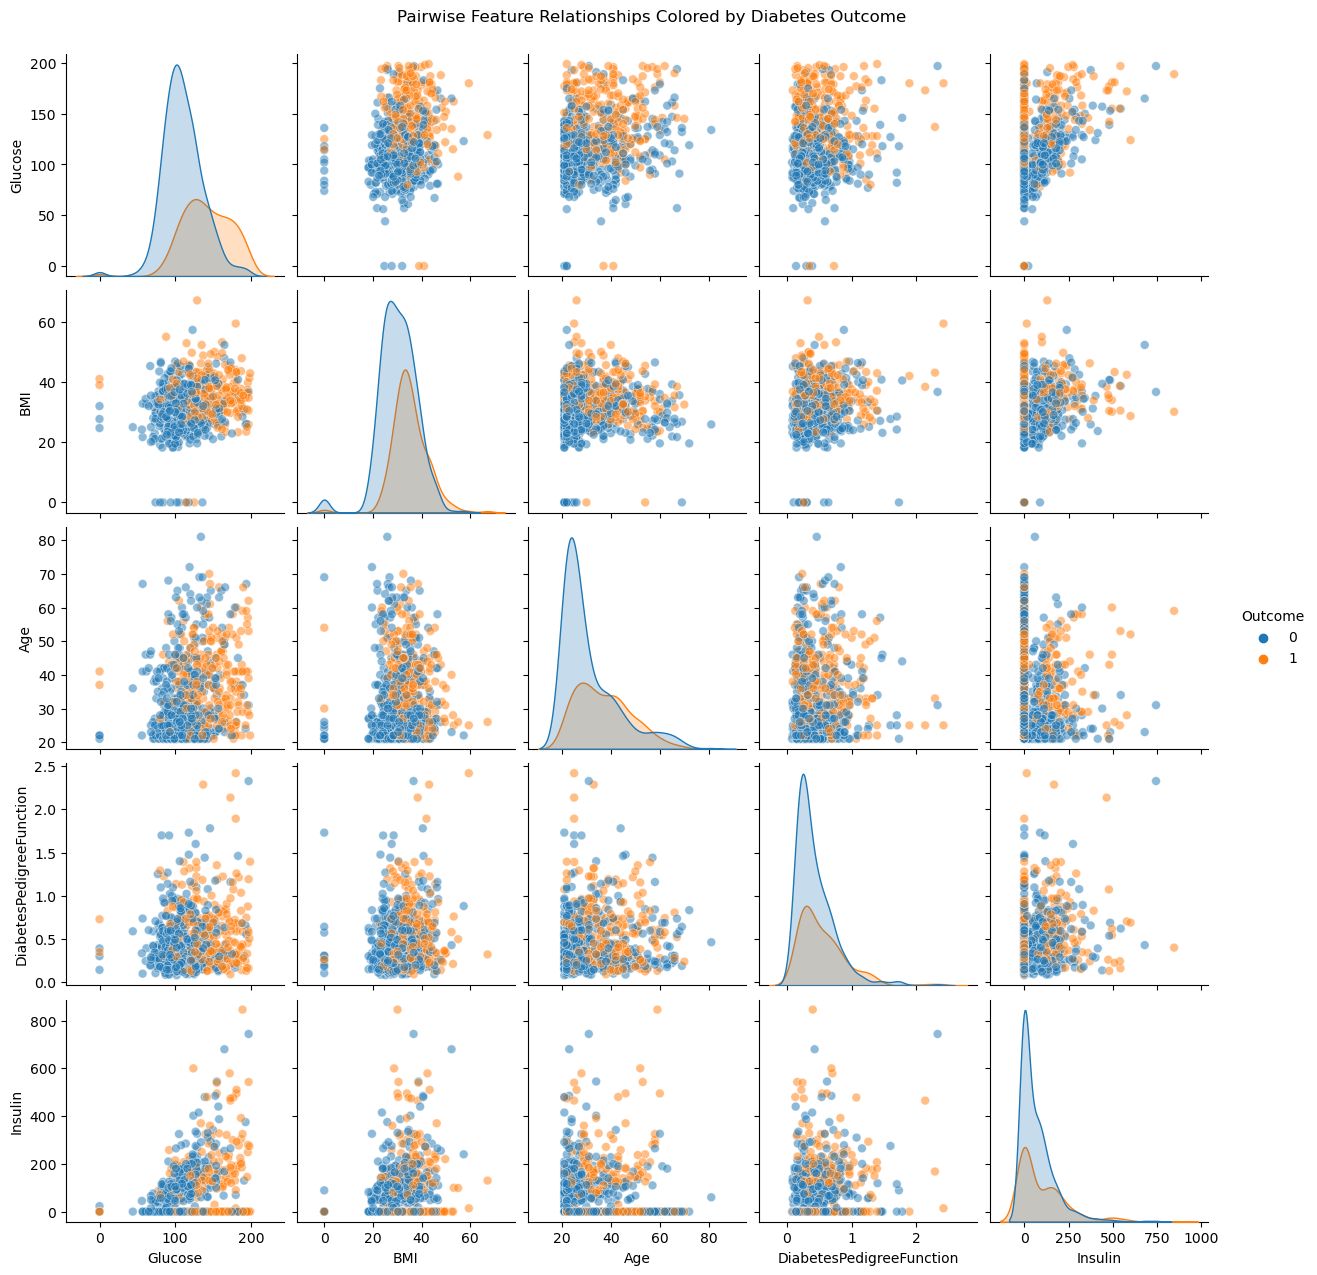

In [22]:
import seaborn as sns

# Pick a subset of the most important features (too many = slow/overlapping)
pairplot_cols = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin']

sns.pairplot(df[pairplot_cols + ['Outcome']], hue='Outcome', plot_kws={'alpha':0.5, 's':40})
plt.suptitle('Pairwise Feature Relationships Colored by Diabetes Outcome', y=1.02)
plt.show()


This pairplot provides a bird’s-eye view of how the most important features interact and cluster, colored by diabetes outcome.
Several trends emerge:

- Glucose and BMI both show higher values in the positive (orange) group, suggesting these are strong differentiators.

- There is substantial overlap between the two groups for most features, especially for Insulin and Age, underscoring the complexity of diabetes prediction.

- The absence of clear, isolated clusters highlights why simple thresholding is insufficient and why machine learning approaches are necessary to uncover subtle patterns.

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## 2. Key Insights

**Summary of Findings:**
- Higher glucose levels and BMI tend to correlate with a higher rate of diabetes.
- Several features show overlap between groups, meaning diabetes prediction is not always visually obvious.
- Some features, such as Insulin and SkinThickness, have many zeros (possibly missing or unrecorded values).

These findings will guide our feature engineering and future modeling steps.

---


## 3. Next Steps

The next stage will focus on machine learning modeling to predict diabetes and reveal subtler patterns.

---
